<a href="https://colab.research.google.com/github/Kozhedu/Statistics--Python/blob/main/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F_%D0%B8_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Задание 1.

Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

In [2]:
df = pd.read_csv("water.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [4]:
df.head(2)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17


In [5]:
df.isnull().sum()

Unnamed: 0    0
location      0
town          0
mortality     0
hardness      0
dtype: int64

## 1.1. Построить точечный график связи между жёсткостью воды и средней годовой смертностью

In [6]:
X = df["mortality"].values
Y = df["hardness"].values

In [7]:
x_max = np.max(X) + 100
x_min = np.min(X) - 100

In [8]:
x_mean = np.mean(X)
y_mean = np.mean(Y)

In [9]:
n = 0
d = 0
for i in range(len(X)):
    n += (X[i] - x_mean) * (Y[i] - y_mean)
    d += (X[i] - x_mean) ** 2

In [10]:
b1 = n/ d
b0 = y_mean - (b1 * x_mean)

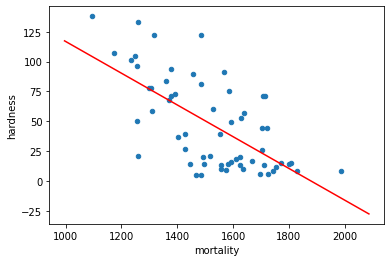

In [11]:

x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x

df.plot(kind='scatter', x='mortality', y='hardness')

plt.plot(x, y, color='#ff0000', label='Linear Regression')

Вывод: По графику наблюдается низкая линейная обратная зависимость  между жёсткостью воды и средней годовой смертностью

## 1.2.Рассчитать коэффициенты корреляции Пирсона и Спирмена

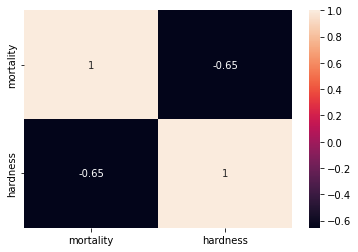

In [12]:
# считаем коэф. корреляции Пирсона
sns.heatmap(df[['mortality', 'hardness']].corr(), annot=True)

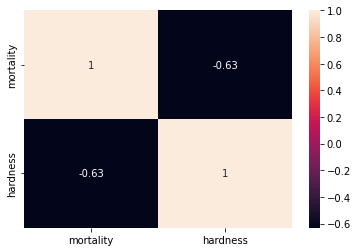

In [13]:
# считаем коэф. корреляции Спирмана
sns.heatmap(df[['mortality', 'hardness']].corr(method='spearman'), annot=True) 

Вывод: коэффициенты корреляции Пирсона и Спирмена подтверждают низкую линейную обратную зависимость между жёсткостью воды и средней годовой смертностью

## 1.3. Построить модель линейной регрессии

In [14]:
X = df[['hardness']]
y = df['mortality']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

## 1.4. Рассчитать коэффициент детерминации

In [18]:
model.score(X_test, y_test)

0.5046490611017092

## 1.5. Вывести график остатков

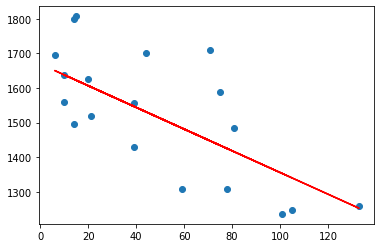

In [19]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

#Задание 2.

Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

In [20]:
df_north = df.loc[df['location'] == 'North']
df_north.head(2)

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14


In [21]:
df_south = df.loc[df['location'] == 'South']
df_south.head(2)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5


## 2.1. Север

In [22]:
X = df_north["mortality"].values
Y = df_north["hardness"].values

In [23]:
x_max = np.max(X) + 100
x_min = np.min(X) - 100

x_mean = np.mean(X)
y_mean = np.mean(Y)

n = 0
d = 0
for i in range(len(X)):
    n += (X[i] - x_mean) * (Y[i] - y_mean)
    d += (X[i] - x_mean) ** 2

b1 = n/ d
b0 = y_mean - (b1 * x_mean)   

x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x

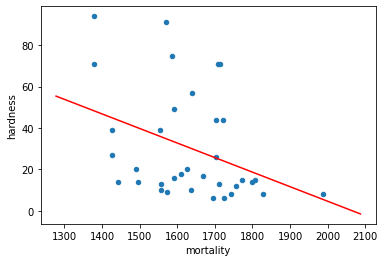

In [24]:
df_north.plot(kind='scatter', x='mortality', y='hardness')

plt.plot(x, y, color='#ff0000', label='Linear Regression')

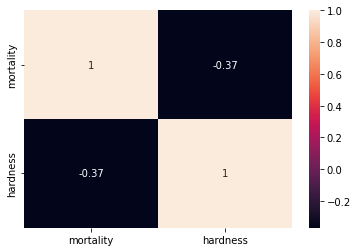

In [25]:
# считаем коэф. корреляции Пирсона
sns.heatmap(df_north[['mortality', 'hardness']].corr(), annot=True)

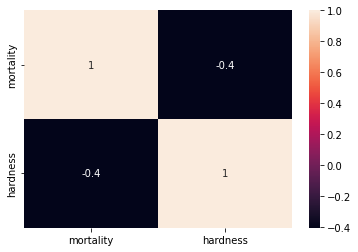

In [26]:
# считаем коэф. корреляции Спирмана
sns.heatmap(df_north[['mortality', 'hardness']].corr(method='spearman'), annot=True) 

Для Севера отсутствует какая-либо линейная зависимость

In [27]:
X = df_north[['hardness']]
y = df_north['mortality']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)

In [31]:
model.score(X_test, y_test)

0.018885304285745863

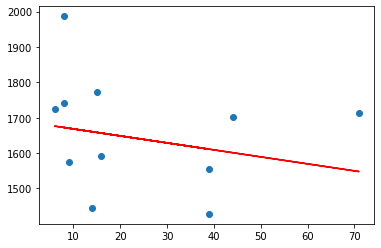

In [32]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

## 2.2. Юг

In [33]:
X = df_south["mortality"].values
Y = df_south["hardness"].values

In [34]:
x_max = np.max(X) + 100
x_min = np.min(X) - 100

x_mean = np.mean(X)
y_mean = np.mean(Y)

n = 0
d = 0
for i in range(len(X)):
    n += (X[i] - x_mean) * (Y[i] - y_mean)
    d += (X[i] - x_mean) ** 2

b1 = n/ d
b0 = y_mean - (b1 * x_mean)   

x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x

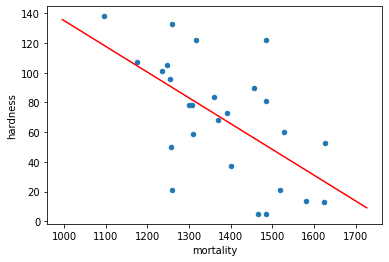

In [35]:
df_south.plot(kind='scatter', x='mortality', y='hardness')

plt.plot(x, y, color='#ff0000', label='Linear Regression')

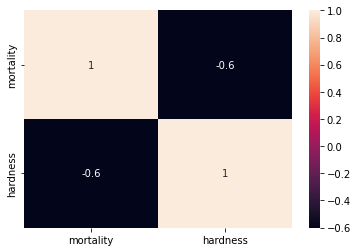

In [36]:
sns.heatmap(df_south[['mortality', 'hardness']].corr(), annot=True)

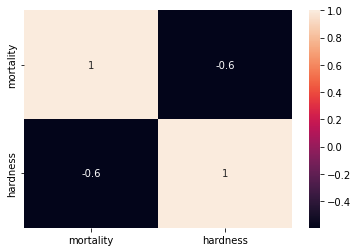

In [37]:
# считаем коэф. корреляции Спирмана
sns.heatmap(df_south[['mortality', 'hardness']].corr(method='spearman'), annot=True) 

Для Юга наблюдается низкая линейная обратная зависисмость между жёсткостью воды и средней годовой смертностью

In [38]:
X = df_south[['hardness']]
y = df_south['mortality']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)

In [42]:
model.score(X_test, y_test)

-2.5519223012352077

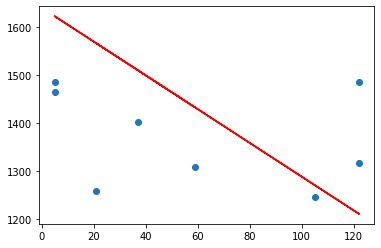

In [43]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

Вывод:

В целом по всем районам наблюдается низкая линейная обратная зависимость между жёсткостью воды и средней годовой смертностью

Для северных районов отсутствует какая-либо линейная зависимость

Для южных районов наблюдается низкая линейная обратная зависисмость между жёсткостью воды и средней годовой смертностью
